<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [21]:
# type your code here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]


#### Load the Life expectancy dataset and display the first five records 

In [71]:
life = pd.read_csv("Life_Expectancy.csv")
life.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [32]:
# check the size of the dataframe

# type your code here
life.shape

(182, 20)

In [33]:
# display dataset information understand the dataset

# type your code here
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
Country              182 non-null object
Year                 182 non-null int64
Status               182 non-null object
Adult_Mortality      173 non-null float64
Infant_Deaths        182 non-null int64
Alcohol              15 non-null float64
Hepatitis B          173 non-null float64
Measles              182 non-null int64
BMI                  178 non-null float64
Underfive_Deaths     182 non-null int64
Polio                182 non-null int64
Diphtheria           182 non-null int64
HIV                  182 non-null float64
GDP                  157 non-null float64
Population           141 non-null float64
Malnourished10_19    178 non-null float64
Malnourished5_9      178 non-null float64
Income_Index         169 non-null float64
Schooling            173 non-null float64
Life_Expectancy      173 non-null float64
dtypes: float64(12), int64(6), object(2)
memory usage: 28.6+ KB


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
life.isnull().sum()[life.isnull().sum()!=0]

Adult_Mortality        9
Alcohol              167
Hepatitis B            9
BMI                    4
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
life.loc[life.Adult_Mortality.isnull()]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
46,Dominica,2013,Developing,NaN,0,0.01,96.0,0,58.4,0,96,96,0.1,722.756650,NaN,2.7,2.6,0.721,12.7,NaN
100,Marshall Islands,2013,Developing,NaN,0,0.01,8.0,0,81.6,0,79,79,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0,NaN
104,Monaco,2013,Developing,NaN,0,0.01,99.0,0,NaN,0,99,99,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Nauru,2013,Developing,NaN,0,0.01,87.0,0,87.3,0,87,87,0.1,136.183210,NaN,0.1,0.1,NaN,9.6,NaN
118,Niue,2013,Developing,NaN,0,0.01,99.0,0,77.3,0,99,99,0.1,NaN,NaN,0.1,0.1,NaN,NaN,NaN
122,Palau,2013,Developing,NaN,0,NaN,99.0,0,83.3,0,99,99,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2,NaN
135,Saint Kitts and Nevis,2013,Developing,NaN,0,8.54,97.0,0,5.2,0,96,96,0.1,NaN,NaN,3.7,3.6,0.749,13.4,NaN
138,San Marino,2013,Developing,NaN,0,0.01,69.0,0,NaN,0,69,69,0.1,NaN,NaN,NaN,NaN,NaN,15.1,NaN
168,Tuvalu,2013,Developing,NaN,0,0.01,9.0,0,79.3,0,9,9,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0,NaN


In [36]:
life['Adult_Mortality'].fillna(life['Adult_Mortality'].median(), inplace=True)
life['Hepatitis B'].fillna(life['Hepatitis B'].median(), inplace=True)
life['BMI'].fillna(life['BMI'].median(), inplace=True)
life['GDP'].fillna(life['GDP'].median(), inplace=True)
life['Population'].fillna(life['Population'].median(), inplace=True)
life['Malnourished10_19'].fillna(life['Malnourished10_19'].median(), inplace=True)
life['Malnourished5_9'].fillna(life['Malnourished5_9'].median(), inplace=True)
life['Schooling'].fillna(life['Schooling'].median(), inplace=True)
life['Income_Index'].fillna(life['Income_Index'].median(), inplace=True)
life['Life_Expectancy'].fillna(life['Life_Expectancy'].median(), inplace=True)


In [72]:
for i in life.isnull().sum()[life.isnull().sum() != 0].index:
    life[i].fillna(life[i].median(), inplace = True)

In [73]:
life.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Alcohol              0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# Removing Alcohol

life.drop("Alcohol", axis=1, inplace=True)

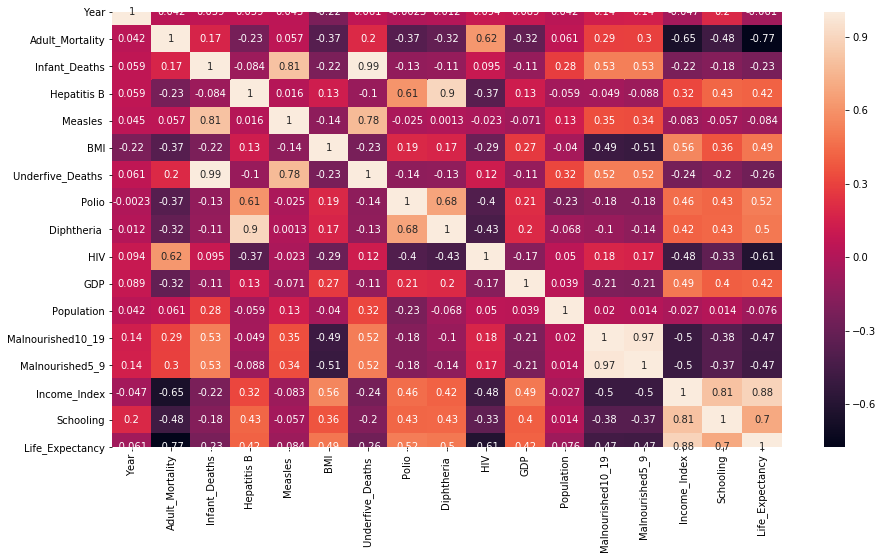

In [39]:
sns.heatmap(life.corr(), annot=True)
plt.show()

In [46]:
life.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [47]:
life.drop(['Diphtheria ','Underfive_Deaths ','Malnourished5_9','Schooling']
         ,axis=1,inplace=True)

In [48]:
life.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Polio', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Income_Index', 'Life_Expectancy'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here

life.select_dtypes(include='object').columns

Index(['Country', 'Status'], dtype='object')

In [50]:
life.describe(include='object')

,Country,Status
count,182,182
unique,182,2
top,Myanmar,Developing
freq,1,150


In [51]:
pd.get_dummies(life.Status, drop_first=True)

,Developing
0,1
1,1
2,1
3,1
4,1
...,...
177,1
178,1
179,1
180,1


In [56]:
life = pd.concat([life,pd.get_dummies(life['Status'], drop_first=True)],axis=1)

In [57]:
life.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Polio,HIV,GDP,Population,Malnourished10_19,Income_Index,Life_Expectancy,Developing
0,Afghanistan,2015,Developing,263.0,62,65.0,1154,19.1,6,0.1,584.259210,33736494.0,17.2,0.479,65.0,1
1,Albania,2015,Developing,74.0,0,99.0,0,58.0,99,0.1,3954.227830,28873.0,1.2,0.762,77.8,1
2,Algeria,2015,Developing,19.0,21,95.0,63,59.5,95,0.1,4132.762920,39871528.0,6.0,0.743,75.6,1
3,Angola,2015,Developing,335.0,66,64.0,118,23.3,7,1.9,3695.793748,2785935.0,8.3,0.531,52.4,1
4,Antigua,2015,Developing,13.0,0,99.0,0,47.7,86,0.2,13566.954100,1977527.0,3.3,0.784,76.4,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
life.Adult_Mortality.fillna(life.Adult_Mortality.median(), inplace=True)

In [77]:
for i in life.isnull().sum()[life.isnull().sum() != 0].index:
    life[i].fillna(life[i].median(), inplace = True)

life.drop(columns = ['Diphtheria ', 'Underfive_Deaths ','Malnourished5_9', 'Schooling'  ], inplace = True)

life = pd.concat([life, pd.get_dummies(life['Status'], drop_first = True)], axis = 1)

life.drop(columns = ['Country', 'Status'], inplace = True)


X = life.drop(columns = ["Life_Expectancy"])
y = life['Life_Expectancy']

# Adding constant:
import statsmodels.api as sma
X = sma.add_constant(X)

# splitting train test split:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)
# Bulding model:
from statsmodels.api import OLS
model = OLS(ytrain, xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     67.27
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.89e-52
Time:                        15:40:43   Log-Likelihood:                -346.92
No. Observations:                 145   AIC:                             723.8
Df Residuals:                     130   BIC:                             768.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1133.3770   1104.013      1.027      0.307   -1050.781    3317.535
Year                 -0.5357      0.548     -0.978      0.330      -1.620       0.548
Adult_Mortality      -0.0245      0.004     -6.186      0.000      -0.032      -0.017
Infant_Deaths         0.0011      0.006      0.202      0.840      -0.010       0.012
Alcohol              -0.1010      0.229     -0.442      0.659      -0.553       0.351
Hepatitis B           0.0319      0.012      2.734      0.007       0.009       0.055
Measles           -1.993e-06   4.87e-05     -0.041      0.967   -9.84e-05    9.44e-05
BMI                  -0.0048      0.015     -0.326      0.745      -0.034       0.024
Polio                 0.0078      0.012      0.639      0.524      -0.016       0.032
HIV                  -0.4389      0.239     -1.836      0.069      -0.912       0.034
GDP               -1.256e-05   2.55e-05     -0.492      0.623    -6.3e-05    3.79e-05
Population         -7.19e-09    9.2e-09     -0.781      0.436   -2.54e-08     1.1e-08
Malnourished10_19    -0.1383      0.083     -1.671      0.097      -0.302       0.025
Income_Index         29.4678      2.939     10.028      0.000      23.654      35.281
Developing           -0.9501      0.783     -1.213      0.227      -2.499       0.599
==============================================================================
Omnibus:                       24.895   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.166
Skew:                          -0.628   Prob(JB):                     1.58e-15
Kurtosis:                       6.115   Cond. No.                     1.45e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
input_var = life.loc[:,['Hepatitis B', 'Polio']]
# type your code here

input_var = life.loc[:,['Hepatitis B', 'Polio']]
newx = sma.add_constant(input_var)
y  =life.Life_Expectancy

model = OLS(y, newx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     36.05
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           7.00e-14
Time:                        15:43:14   Log-Likelihood:                -601.81
No. Observations:                 182   AIC:                             1210.
Df Residuals:                     179   BIC:                             1219.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.9294      1.895     30.037      0.000      53.189      60.669
Hepatitis B     0.0506      0.025      2.018      0.045       0.001       0.100
Polio           0.1329      0.025      5.323      0.000       0.084       0.182
==============================================================================
Omnibus:                        5.950   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.046
Skew:                          -0.444   Prob(JB):                       0.0487
Kurtosis:                       2.912   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# SSE - Unexplained Variation in the Model
pred = model.predict(newx)

residual = y-pred

print("SSE: ", np.sum(residual**2))

SSE:  7937.786609004849


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
input_var = life.loc[:,['Malnourished10_19', 'Life_Expectancy']]
# type your code here

input_var1 = input_var.drop('Life_Expectancy', axis=1)
newx = sma.add_constant(input_var1)
y  =life.Life_Expectancy

model = OLS(y, newx).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     50.44
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.75e-11
Time:                        15:47:26   Log-Likelihood:                -610.12
No. Observations:                 182   AIC:                             1224.
Df Residuals:                     180   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.0018      0.752    101.058      0.000      74.518      77.486
Malnourished10_19    -0.8961      0.126     -7.102      0.000      -1.145      -0.647
==============================================================================
Omnibus:                        6.767   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.998
Skew:                          -0.475   Prob(JB):                       0.0302
Kurtosis:                       2.859   Cond. No.                         8.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
X = life.drop("Life_Expectancy", axis = 1)
X = sma.add_constant(X)
y  =life.Life_Expectancy

lrmodel = OLS(y, X).fit()
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     86.12
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.14e-68
Time:                        15:56:54   Log-Likelihood:                -440.91
No. Observations:                 182   AIC:                             911.8
Df Residuals:                     167   BIC:                             959.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               655.5326    999.272      0.656      0.513   -1317.300    2628.365
Year                 -0.2987      0.496     -0.602      0.548      -1.278       0.680
Adult_Mortality      -0.0240      0.003     -6.966      0.000      -0.031      -0.017
Infant_Deaths         0.0021      0.005      0.391      0.697      -0.009       0.013
Alcohol               0.0563      0.169      0.333      0.739      -0.277       0.390
Hepatitis B           0.0355      0.011      3.146      0.002       0.013       0.058
Measles           -1.091e-05   4.91e-05     -0.222      0.825      -0.000    8.61e-05
BMI                  -0.0087      0.013     -0.665      0.507      -0.035       0.017
Polio                 0.0100      0.012      0.832      0.407      -0.014       0.034
HIV                  -0.5667      0.217     -2.610      0.010      -0.995      -0.138
GDP               -5.857e-06   2.31e-05     -0.254      0.800   -5.14e-05    3.97e-05
Population        -8.309e-09   9.21e-09     -0.902      0.368   -2.65e-08    9.87e-09
Malnourished10_19    -0.1503      0.077     -1.958      0.052      -0.302       0.001
Income_Index         29.3528      2.637     11.131      0.000      24.146      34.559
Developing           -1.0378      0.698     -1.487      0.139      -2.416       0.340
==============================================================================
Omnibus:                       18.479   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.807
Skew:                          -0.430   Prob(JB):                     1.38e-09
Kurtosis:                       5.154   Cond. No.                     1.30e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from sklearn.linear_model import SGDRegressor, LinearRegression

lr = LinearRegression()
sgd = SGDRegressor()

In [99]:
print("SGD RMSE:",np.sqrt(mean_squared_error(ytest, sgd.fit(xtrain, ytrain).predict(xtest))))

SGD RMSE: 3.584139918256051e+22


In [103]:
print("LR RMSE:",np.sqrt(mean_squared_error(ytest, lr.fit(xtrain, ytrain).predict(xtest))))

LR RMSE: 3.121774356867705


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
life.columns

Index(['Year', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', 'BMI', 'Polio', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Income_Index', 'Life_Expectancy', 'Developing'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [105]:
lrfit = LinearRegression()

pred = lrfit.fit(xtrain, ytrain).predict(xtrain)
pred_test = lrfit.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE Train: 2.64743829318712
RMSE Test: 3.121774356867705


In [106]:

from sklearn.metrics import r2_score
print("r2 train - ",r2_score(ytrain, pred))
print("r2 test - ",r2_score(ytest, pred_test))

# Conclusion -

r2 train -  0.8786990259317904
r2 test -  0.869129766739879


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Measles is having 0.81 correlation with infant death. We need to let it go as it is violating multicollinearity assumption.

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet

ridge = Ridge(alpha=5, normalize=True)
pred = ridge.fit(xtrain, ytrain).predict(xtrain)
pred_test = ridge.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))
print("r2 train - ",r2_score(ytrain, pred))
print("r2 test - ",r2_score(ytest, pred_test))

# As we increase alpha (means increase bias) then the model reduces the overfitting but 
# we start loosing the performance of the model...

RMSE Train: 5.033972494453999
RMSE Test: 6.051690922655589
r2 train -  0.5614346943548265
r2 test -  0.5081968147214304


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
life.columns

Index(['Year', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Hepatitis B',
       'Measles ', 'BMI', 'Polio', 'HIV', 'GDP', 'Population',
       'Malnourished10_19', 'Income_Index', 'Life_Expectancy', 'Developing'],
      dtype='object')

In [113]:
input_var = life.loc[:,['Hepatitis B','Measles ','Polio','HIV']]

x_train, x_test, y_train, y_test = train_test_split(input_var, y, test_size = 0.20, random_state = 42)
ridge = Ridge(alpha=1.5, normalize=True)
pred = ridge.fit(x_train, y_train).predict(x_train)
pred_test = ridge.fit(x_train, y_train).predict(x_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

RMSE Train: 6.08220160396608
RMSE Test: 7.165256476091717
r2 train:  0.35977265645273127
r2 test:  0.3105522805449198


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
input_var = life.loc[:,['Malnourished10_19','Measles ','HIV']]


x_train, x_test, y_train, y_test = train_test_split(input_var, y, test_size = 0.20, random_state = 42)
ridge = Ridge(alpha=1.0, normalize=True)
pred = ridge.fit(x_train, y_train).predict(x_train)
pred_test = ridge.fit(x_train, y_train).predict(x_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))


RMSE Train: 5.905771656241881
RMSE Test: 7.008397486638196
r2 train:  0.39637683513864674
r2 test:  0.3404081069684395


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
enet = ElasticNet(alpha = 0.1,l1_ratio = 0.001)

pred = enet.fit(xtrain, ytrain).predict(xtrain)
pred_test = enet.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))
print("r2 train - ",r2_score(ytrain, pred))
print("r2 test - ",r2_score(ytest, pred_test))

RMSE Train: 3.4675973562850415
RMSE Test: 3.980461542183174
r2 train -  0.7919010341116848
r2 test -  0.7872327779788716


In [127]:
from sklearn.model_selection import GridSearchCV

parameters = [{"alpha": [0.00001,0.001, 0.99, 0.1, 0.05, 0.005, 0.722, 1, 2]}]

grid = GridSearchCV(estimator=ridge,param_grid=parameters, cv = 10)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'alpha': 0.005}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [123]:
# type your code here
lasso = Lasso(alpha = 0.5, normalize=True, max_iter=100000)

pred = lasso.fit(xtrain, ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))
print("r2 trai: ",r2_score(ytrain, pred))
print("r2 test: ",r2_score(ytest, pred_test))

RMSE Train: 7.025849673193515
RMSE Test: 8.012019199837294
r2 trai:  0.14570020471846756
r2 test:  0.13797110909920174


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [124]:
parameters = [{'alpha':[7,8,9,10,11]}]

grid = GridSearchCV(estimator=ridge,param_grid=parameters, cv = 10)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'alpha': 7}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [129]:
parameters = [{'alpha':[7,8,9,10,11]}]

grid = GridSearchCV(estimator=lasso,param_grid=parameters, cv = 10)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'alpha': 7}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
# type your code here

parameters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
              "l1_ratio": [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

grid = GridSearchCV(estimator=enet, param_grid=parameters, cv = 10)

grid.fit(xtrain, ytrain)
print(grid.best_params_) # Alpha 7
from sklearn.model_selection import GridSearchCV

{'alpha': 0.1, 'l1_ratio': 0.9}


In [131]:
enet = ElasticNet(alpha = 0.1,l1_ratio = 0.9, normalize=True)

pred = enet.fit(xtrain, ytrain).predict(xtrain)
pred_test = enet.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))
print("r2 train - ",r2_score(ytrain, pred))
print("r2 test - ",r2_score(ytest, pred_test))

RMSE Train: 4.313002424335012
RMSE Test: 5.284629199264286
r2 train -  0.6780621790039121
r2 test -  0.6249692323637299


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
# type your code here

parameters = [{"l1_ratio": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

grid = GridSearchCV(estimator=enet, param_grid=parameters, cv = 10)

grid.fit(xtrain, ytrain)
print(grid.best_params_) # Alpha 7
from sklearn.model_selection import GridSearchCV

{'l1_ratio': 1}


In [133]:
enet = ElasticNet(alpha = 0.8,l1_ratio = 1, normalize=True)

pred = enet.fit(xtrain, ytrain).predict(xtrain)
pred_test = enet.fit(xtrain, ytrain).predict(xtest)

print("RMSE Train:", np.sqrt(mean_squared_error(ytrain, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(ytest, pred_test)))
print("r2 train - ",r2_score(ytrain, pred))
print("r2 test - ",r2_score(ytest, pred_test))

RMSE Train: 7.601402023505195
RMSE Test: 8.63188477182958
r2 train -  0.0
r2 test -  -0.0005738012611347099
